In [3]:
# Import and view the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

GasUsage = pd.read_csv('GasUsage_complete.csv')
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,"Tuesday, July 12, 2022",0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,"Monday, July 11, 2022",0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,"Sunday, July 10, 2022",0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,"Saturday, July 9, 2022",0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,"Friday, July 8, 2022",0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,"Sunday, February 14, 2021",5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,"Saturday, February 13, 2021",4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,"Friday, February 12, 2021",6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,"Thursday, February 11, 2021",6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


In [4]:
# Convert dates to YYYY-MM-DD
GasUsage['Date'] = pd.to_datetime(GasUsage['Date'])

# Remove days with no gas usage
GasUsage = GasUsage[GasUsage['Gas'] > 0]

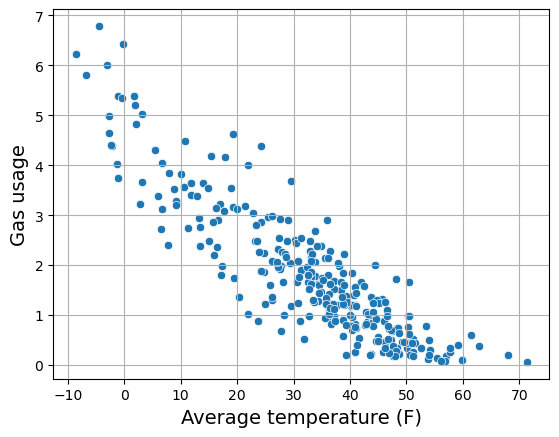

In [3]:
# Scatterplot of gas usage by temperature
p = sns.scatterplot(data=GasUsage, x='Average', y='Gas')
p.set_xlabel('Average temperature (F)', fontsize=14)
p.set_ylabel('Gas usage', fontsize=14)
plt.grid()

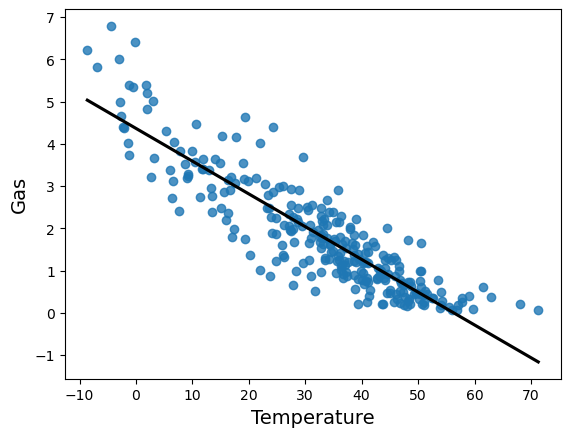

In [4]:
# Scatterplot of gas usage by temperature with regression line
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);

In [5]:
# Fit linear regression model
LinearModel = LinearRegression()
X = GasUsage['Average'].values.reshape(-1, 1)
y = GasUsage['Gas'].values.reshape(-1, 1)

LinearModel = LinearModel.fit(X.reshape(-1, 1), y)

print('Slope =', LinearModel.coef_)
print('Intercept =', LinearModel.intercept_)

Slope = [[-0.07752534]]
Intercept = [4.3647434]


In [7]:
# Make predictions
LinearModel.predict([[32]])

array([[1.88393245]])

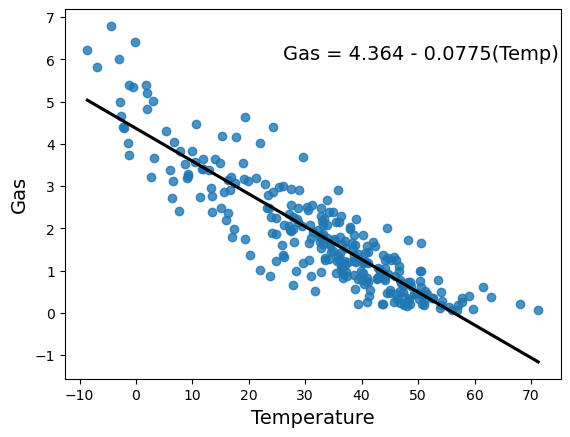

In [7]:
# Scatterplot of gas usage by temperature, with regression equation
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14)
plt.text(
    75,
    6,
    "Gas = 4.364 - 0.0775(Temp)",
    horizontalalignment='right',
    size=14,
    color='black',
);